In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
dfamount=pd.read_csv('Auto_Insurance_Claims_amount.csv')
dfamount


,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [3]:
dfamount.shape

(9134, 26)

In [4]:
dfamount.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [5]:
dfamount.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
dfamount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [7]:
#dtypes: float64(2), int64(6), object(18)

In [8]:
dfamount.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
# outliers are present cause the gap between 75% and max is more in some features-->
#High standard deviation are present in some features--

In [10]:
dfamount.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [11]:
#no missing data good

In [12]:
#object datatype

In [13]:
#check for duplicated data
duplicate=dfamount.duplicated()
print(duplicate.sum())
dfamount[duplicate]

0


,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


In [14]:
#no duplicate values too 

In [15]:
for col in dfamount.columns:
    if dfamount[col].dtype=="object":
        print(col)  

Customer
Country
State Code
State
Response
Coverage
Education
Effective To Date
EmploymentStatus
Gender
Location Code
Marital Status
Policy Type
Policy
Claim Reason
Sales Channel
Vehicle Class
Vehicle Size


In [16]:
dfamount.Country.value_counts()

US    9134
Name: Country, dtype: int64

In [17]:
 #customer column has nothing to do with total claim amount
 #Country has only one value 
#statecode is there and state is there both show same info

In [18]:
dfamount.drop('Customer',axis=1,inplace=True) #this is basically id 

In [19]:
dfamount.drop('State Code',axis=1,inplace=True)

In [20]:
dfamount.drop('Country',axis=1,inplace=True)

In [21]:
dfamount.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


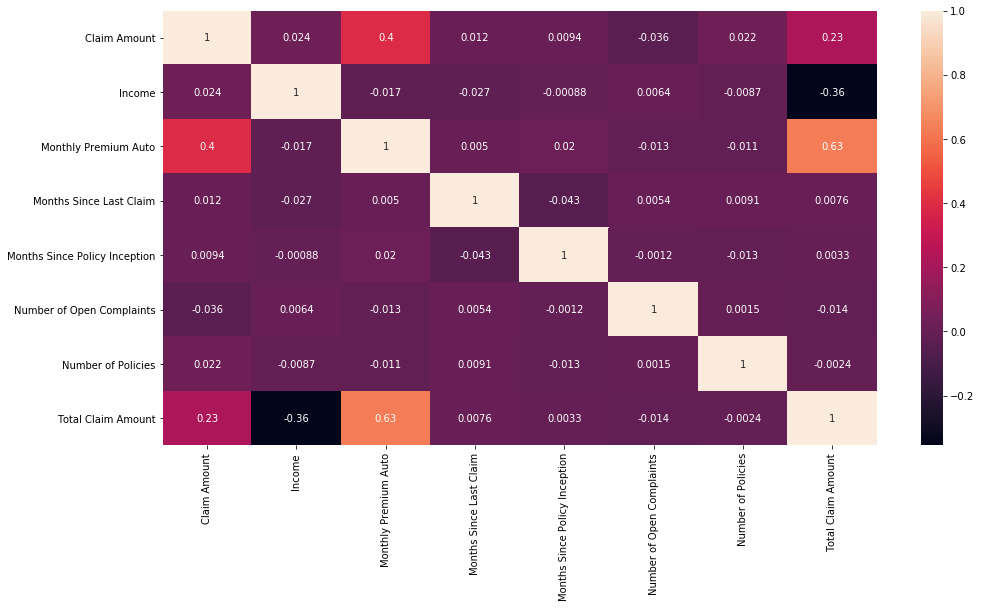

In [22]:
plt.figure(figsize=(16,8))
sns.heatmap(dfamount.corr(),annot=True)

In [23]:
dfamount.head(10)

,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
5,Iowa,825.629780,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,...,94,0,2,Personal Auto,Personal L3,Hail,Web,159.383042,Two-Door Car,Medsize
6,Iowa,538.089864,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,...,13,0,9,Corporate Auto,Corporate L3,Collision,Agent,321.600000,Four-Door Car,Medsize
7,Nebraska,721.610031,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,...,68,0,4,Corporate Auto,Corporate L3,Collision,Agent,363.029680,Four-Door Car,Medsize
8,Iowa,2412.750402,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,...,3,0,2,Corporate Auto,Corporate L3,Collision,Agent,511.200000,Four-Door Car,Medsize
9,Iowa,738.817808,No,Extended,College,2/17/11,Employed,F,28812,Urban,...,7,0,8,Special Auto,Special L2,Hail,Branch,425.527834,Four-Door Car,Medsize


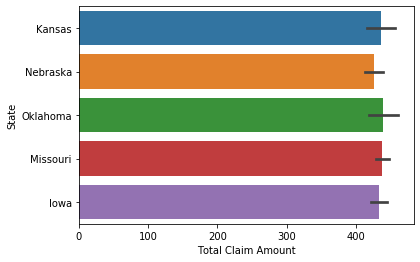

In [24]:
sns.barplot(x = 'Total Claim Amount', y = 'State', data =dfamount)

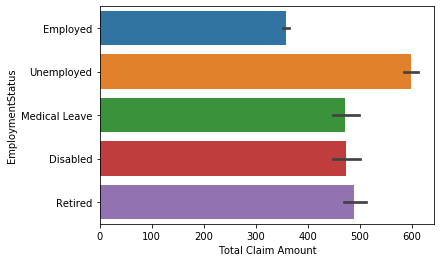

In [25]:
sns.barplot(x = 'Total Claim Amount', y = 'EmploymentStatus', data =dfamount)

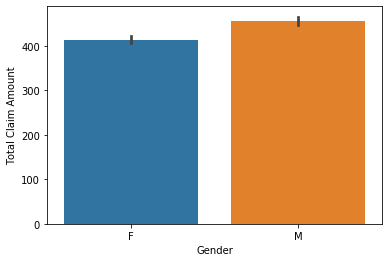

In [26]:
sns.barplot(y = 'Total Claim Amount', x = 'Gender', data =dfamount)

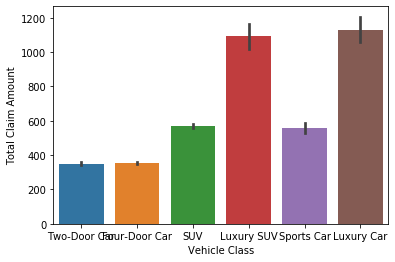

In [27]:
sns.barplot(y = 'Total Claim Amount', x = 'Vehicle Class', data =dfamount)

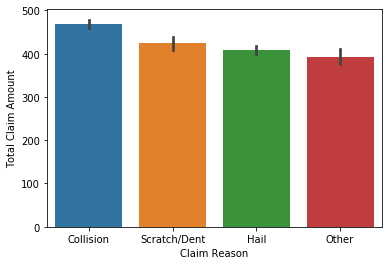

In [28]:
sns.barplot(y = 'Total Claim Amount', x = 'Claim Reason', data =dfamount)

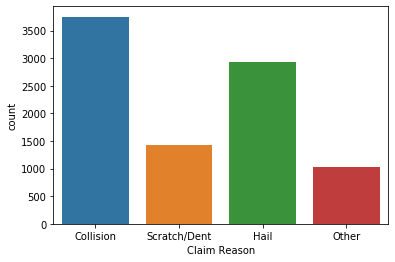

In [29]:
sns.countplot(x = 'Claim Reason', data =dfamount)

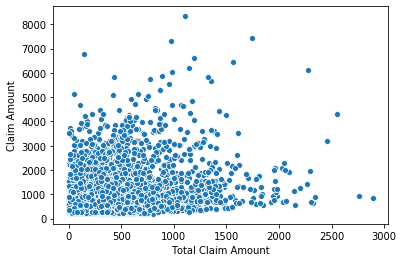

In [30]:
sns.scatterplot(x='Total Claim Amount',y='Claim Amount',data=dfamount)

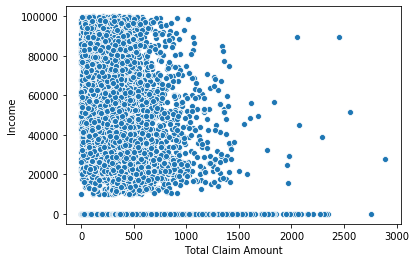

In [31]:
sns.scatterplot(x='Total Claim Amount',y='Income',data=dfamount)

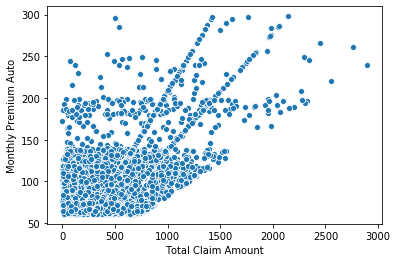

In [32]:
sns.scatterplot(x='Total Claim Amount',y='Monthly Premium Auto',data=dfamount)

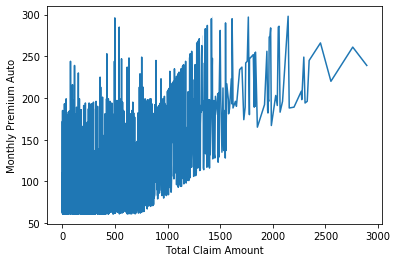

In [33]:
sns.lineplot(x='Total Claim Amount',y='Monthly Premium Auto',data=dfamount)

In [34]:
dfamount['Total Claim Amount']

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64

In [35]:
dfamount.skew()

Claim Amount                     3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

In [36]:
#Lets treat the skewness
import numpy as np
for index in dfamount.skew().index:
    if dfamount.skew().loc[index]>0.55:
        dfamount[index]=np.cbrt(dfamount[index])
    if dfamount.skew().loc[index]<-0.5:
        dfamount[index]=np.cbrt(dfamount[index])


In [37]:
dfamount.skew()

Claim Amount                     1.213436
Income                           0.286887
Monthly Premium Auto             1.316268
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        1.624584
Number of Policies               0.715488
Total Claim Amount              -0.415936
dtype: float64

In [38]:
dfamount['Total Claim Amount']

0        7.273597
1       10.420303
2        8.274204
3        8.092068
4        5.169282
          ...    
9129     5.830779
9130     7.238070
9131     9.247396
9132     8.841676
9133     7.176466
Name: Total Claim Amount, Length: 9134, dtype: float64

In [39]:
dfamount.drop('Effective To Date',axis=1,inplace=True)#no relevance to total claim amount

In [40]:
#OUTLIERS

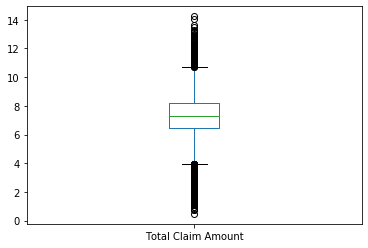

In [41]:
dfamount['Total Claim Amount'].plot.box()

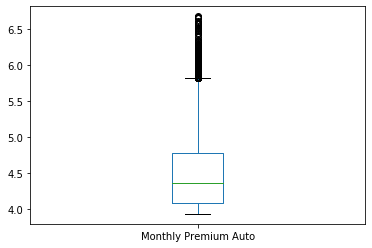

In [42]:
dfamount['Monthly Premium Auto'].plot.box()

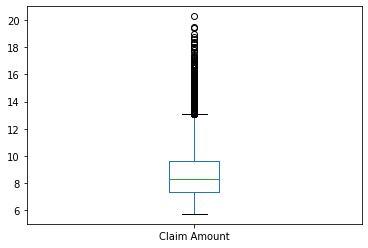

In [43]:
dfamount['Claim Amount'].plot.box()

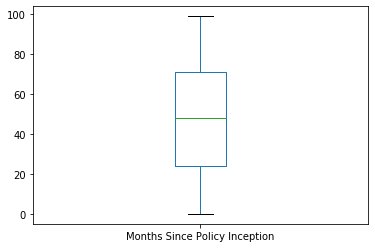

In [44]:
dfamount['Months Since Policy Inception'].plot.box()

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(dfamount[['Claim Amount','Monthly Premium Auto','Total Claim Amount']]))
#z=np.abs(zscore(dfamount)
z

array([[1.10627904, 0.77881078, 0.05957529],
       [0.04031082, 0.1381747 , 1.82611473],
       [1.01914056, 0.5817002 , 0.62130921],
       ...,
       [0.27177263, 0.17074701, 1.16765278],
       [0.14981519, 0.20411854, 0.93988396],
       [1.16535105, 0.4642285 , 0.00504701]])

In [46]:
threshold=3
print(np.where(z>3))

(array([  31,   45,   50,   51,   71,   79,  129,  181,  196,  248,  248,
        292,  337,  373,  375,  404,  407,  408,  425,  496,  510,  512,
        522,  541,  601,  633,  664,  716,  755,  790,  832,  832,  836,
        840,  856,  872,  888,  888,  926,  982, 1002, 1011, 1071, 1078,
       1109, 1133, 1174, 1200, 1221, 1233, 1237, 1240, 1283, 1292, 1300,
       1312, 1328, 1330, 1364, 1383, 1383, 1408, 1466, 1473, 1516, 1521,
       1552, 1555, 1558, 1626, 1640, 1687, 1796, 1803, 1812, 1819, 1852,
       1858, 1858, 1861, 1881, 1907, 1974, 1974, 2024, 2037, 2065, 2104,
       2153, 2180, 2190, 2208, 2225, 2261, 2286, 2294, 2303, 2334, 2336,
       2424, 2481, 2488, 2504, 2504, 2540, 2600, 2607, 2652, 2695, 2775,
       2895, 2895, 2908, 2923, 2989, 3008, 3055, 3067, 3145, 3156, 3210,
       3234, 3273, 3325, 3424, 3457, 3469, 3475, 3557, 3561, 3593, 3628,
       3634, 3692, 3695, 3723, 3760, 3760, 3763, 3854, 3881, 3889, 3909,
       3932, 4074, 4078, 4079, 4086, 4102, 4109, 4

In [47]:
df_new=dfamount[(z<3).all(axis=1)]

In [48]:
df_new

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,6.513596,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0.00000,1.000000,Corporate Auto,Corporate L3,Collision,Agent,7.273597,Two-Door Car,Medsize
1,Nebraska,8.870379,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0.00000,2.000000,Personal Auto,Personal L3,Scratch/Dent,Agent,10.420303,Four-Door Car,Medsize
2,Oklahoma,10.882336,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0.00000,1.259921,Personal Auto,Personal L3,Collision,Agent,8.274204,Two-Door Car,Medsize
3,Missouri,9.144125,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0.00000,1.912931,Corporate Auto,Corporate L2,Collision,Call Center,8.092068,SUV,Medsize
4,Kansas,6.552779,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0.00000,1.000000,Personal Auto,Personal L1,Collision,Agent,5.169282,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Missouri,13.277276,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,89,0.00000,1.259921,Personal Auto,Personal L1,Hail,Web,5.830779,Four-Door Car,Medsize
9130,Missouri,6.765360,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,28,0.00000,1.000000,Corporate Auto,Corporate L3,Collision,Branch,7.238070,Four-Door Car,Medsize
9131,Missouri,9.346142,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,1.44225,1.259921,Corporate Auto,Corporate L2,Collision,Branch,9.247396,Four-Door Car,Medsize
9132,Missouri,9.095462,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0.00000,1.442250,Personal Auto,Personal L2,Scratch/Dent,Branch,8.841676,Four-Door Car,Large


In [49]:
#outliers are present but i cant do anything zscore changes the values in columns

# Machine learning for regression

In [50]:
#Let's now divide the dataset into input and output
df_x=df_new.drop(columns=["Total Claim Amount"])
y=df_new[["Total Claim Amount"]]

In [51]:
#we will convert the input into into integers using get_dummies
df_x=pd.get_dummies(df_x,drop_first=True)

In [52]:
#lets chcek the shape
df_x.shape

(8817, 50)

In [53]:
y

,Total Claim Amount
0,7.273597
1,10.420303
2,8.274204
3,8.092068
4,5.169282
...,...
9129,5.830779
9130,7.238070
9131,9.247396
9132,8.841676


In [54]:
df_x

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_Kansas,State_Missouri,State_Nebraska,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,6.513596,56274,4.101566,32,5,0.00000,1.000000,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,8.870379,0,4.546836,13,42,0.00000,2.000000,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,10.882336,48767,4.762203,18,38,0.00000,1.259921,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,9.144125,0,4.732623,18,65,0.00000,1.912931,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,6.552779,43836,4.179339,12,44,0.00000,1.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,13.277276,71941,4.179339,18,89,0.00000,1.259921,0,1,0,...,0,0,1,0,0,0,0,0,1,0
9130,6.765360,21604,4.290840,14,28,0.00000,1.000000,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9131,9.346142,0,4.396830,9,37,1.44225,1.259921,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9132,9.095462,21941,4.578857,34,3,0.00000,1.442250,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [55]:
dfamount

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,6.513596,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0.00000,1.000000,Corporate Auto,Corporate L3,Collision,Agent,7.273597,Two-Door Car,Medsize
1,Nebraska,8.870379,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0.00000,2.000000,Personal Auto,Personal L3,Scratch/Dent,Agent,10.420303,Four-Door Car,Medsize
2,Oklahoma,10.882336,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0.00000,1.259921,Personal Auto,Personal L3,Collision,Agent,8.274204,Two-Door Car,Medsize
3,Missouri,9.144125,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0.00000,1.912931,Corporate Auto,Corporate L2,Collision,Call Center,8.092068,SUV,Medsize
4,Kansas,6.552779,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0.00000,1.000000,Personal Auto,Personal L1,Collision,Agent,5.169282,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Missouri,13.277276,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,89,0.00000,1.259921,Personal Auto,Personal L1,Hail,Web,5.830779,Four-Door Car,Medsize
9130,Missouri,6.765360,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,28,0.00000,1.000000,Corporate Auto,Corporate L3,Collision,Branch,7.238070,Four-Door Car,Medsize
9131,Missouri,9.346142,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,1.44225,1.259921,Corporate Auto,Corporate L2,Collision,Branch,9.247396,Four-Door Car,Medsize
9132,Missouri,9.095462,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0.00000,1.442250,Personal Auto,Personal L2,Scratch/Dent,Branch,8.841676,Four-Door Car,Large


In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [58]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [59]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
final_r_state=maxr2_score(lnr,x,y)

r2 score corresponding to  42  is  0.8242082223780747
r2 score corresponding to  43  is  0.8333510810588933
r2 score corresponding to  44  is  0.8410838064744801
r2 score corresponding to  45  is  0.8253715476281354
r2 score corresponding to  46  is  0.8286043659184109
r2 score corresponding to  47  is  0.8303410513958167
r2 score corresponding to  48  is  0.8309206615964688
r2 score corresponding to  49  is  0.8314225870591202
r2 score corresponding to  50  is  0.8240290284640293
r2 score corresponding to  51  is  0.8396036650522284
r2 score corresponding to  52  is  0.827754134967276
r2 score corresponding to  53  is  0.8238287962086258
r2 score corresponding to  54  is  0.8189278710653657
r2 score corresponding to  55  is  0.8378993312653543
r2 score corresponding to  56  is  0.8386489413233382
r2 score corresponding to  57  is  0.839225078985552
r2 score corresponding to  58  is  0.8303350563534354
r2 score corresponding to  59  is  0.8414866727066717
r2 score corresponding to  60 

In [60]:
#lets check for overfitting or underfitting for this model
print("Linear regression\n\n")
model_evaluation(lnr,x,y)

Linear regression


Mean r2 score for regressor:  0.828652461329483
standard deviation in r2 score for regressor:  0.0056126824305742585
[0.83038551 0.82610234 0.8192323  0.83562371 0.83191844]


In [61]:
#lets use random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,150,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [62]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,x,y)

r2 score corresponding to  42  is  0.8492030260795159
r2 score corresponding to  43  is  0.8624747107809152
r2 score corresponding to  44  is  0.8666573121573979
r2 score corresponding to  45  is  0.8532062817172958
r2 score corresponding to  46  is  0.8631464130647287
r2 score corresponding to  47  is  0.8650035778033989
r2 score corresponding to  48  is  0.859701624892811
r2 score corresponding to  49  is  0.865417509397213
r2 score corresponding to  50  is  0.8538682449074725
r2 score corresponding to  51  is  0.8617249633203277
r2 score corresponding to  52  is  0.8585335182397337
r2 score corresponding to  53  is  0.8510984892475929
r2 score corresponding to  54  is  0.8457726752305129
r2 score corresponding to  55  is  0.8530943162352973
r2 score corresponding to  56  is  0.867325636339275
r2 score corresponding to  57  is  0.8583235459897379
r2 score corresponding to  58  is  0.8582909866674724
r2 score corresponding to  59  is  0.8716656120126095
r2 score corresponding to  60  

In [63]:
rfr1=RandomForestRegressor(n_estimators=150)
r_state=maxr2_score(rfr1,x,y)

r2 score corresponding to  42  is  0.848503374563102
r2 score corresponding to  43  is  0.8613341912546667
r2 score corresponding to  44  is  0.8661503961613036
r2 score corresponding to  45  is  0.8529742905978491
r2 score corresponding to  46  is  0.8625318211737281
r2 score corresponding to  47  is  0.863394087275103
r2 score corresponding to  48  is  0.8591002133315335
r2 score corresponding to  49  is  0.8635141400561381
r2 score corresponding to  50  is  0.853880083693314
r2 score corresponding to  51  is  0.8612954739102032
r2 score corresponding to  52  is  0.8581933553738285
r2 score corresponding to  53  is  0.8511288165241305
r2 score corresponding to  54  is  0.8448090267927582
r2 score corresponding to  55  is  0.8532796777422523
r2 score corresponding to  56  is  0.8681777797929617
r2 score corresponding to  57  is  0.8575689557525746
r2 score corresponding to  58  is  0.8565656230038488
r2 score corresponding to  59  is  0.8713597185231331
r2 score corresponding to  60  

In [64]:
print("random forest regression\n\n")
model_evaluation(rfr1,x,y)

random forest regression


Mean r2 score for regressor:  0.8549632647731821
standard deviation in r2 score for regressor:  0.006221980462563765
[0.85407394 0.84712652 0.85025006 0.86475196 0.85861385]


In [65]:
#using grid search for optimal value of k in knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(2,10)}
knr = KNeighborsRegressor()
clf = GridSearchCV(knr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 9}

In [66]:
knr=KNeighborsRegressor(n_neighbors=9)
final_r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42  is  0.5677791026821601
r2 score corresponding to  43  is  0.5918764685800997
r2 score corresponding to  44  is  0.5867742026010241
r2 score corresponding to  45  is  0.5853774588528367
r2 score corresponding to  46  is  0.5971915219157602
r2 score corresponding to  47  is  0.5813829191727975
r2 score corresponding to  48  is  0.5863991261497934
r2 score corresponding to  49  is  0.5885493825158643
r2 score corresponding to  50  is  0.5607920060416203
r2 score corresponding to  51  is  0.596457805945223
r2 score corresponding to  52  is  0.5658199500645851
r2 score corresponding to  53  is  0.573655740497747
r2 score corresponding to  54  is  0.5529370103199491
r2 score corresponding to  55  is  0.5899439162419391
r2 score corresponding to  56  is  0.5886354205700863
r2 score corresponding to  57  is  0.5899354176995932
r2 score corresponding to  58  is  0.5691640558539935
r2 score corresponding to  59  is  0.5577782219562871
r2 score corresponding to  60 

In [67]:
#Lets use SVM
from sklearn.svm import SVR
svc=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [68]:
from sklearn.svm import SVR
svr=SVR(kernel="linear",C=10)
maxr2_score(svr,x,y)

r2 score corresponding to  42  is  0.8156130374121985
r2 score corresponding to  43  is  0.8266434775329032
r2 score corresponding to  44  is  0.836971932175587
r2 score corresponding to  45  is  0.8173892005430254
r2 score corresponding to  46  is  0.8245589181753705
r2 score corresponding to  47  is  0.8250329265940938
r2 score corresponding to  48  is  0.8253141485625133
r2 score corresponding to  49  is  0.8243443496428782
r2 score corresponding to  50  is  0.8178252665826737
r2 score corresponding to  51  is  0.8320480276586054
r2 score corresponding to  52  is  0.8176815571230076
r2 score corresponding to  53  is  0.8209048359043389
r2 score corresponding to  54  is  0.8126442742877296
r2 score corresponding to  55  is  0.8325503884596693
r2 score corresponding to  56  is  0.8301662769761844
r2 score corresponding to  57  is  0.836114826160996
r2 score corresponding to  58  is  0.8228637058588395
r2 score corresponding to  59  is  0.8335313664732965
r2 score corresponding to  60 

82

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 80,test_size=0.20)
rfr1=RandomForestRegressor(n_estimators=150)
rfr1.fit(x_train,y_train)
y_pred=rfr1.predict(x_test)

In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred) )
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

RMSE is:  0.6243532759357702
r2_score is:  0.8545433984541118
Mean squared error: 0.39


In [71]:
dft=pd.DataFrame(y_pred)
dft.to_csv('prediction_claimamount.csv')

In [72]:
import joblib
joblib.dump(rfr1,'claimamount.obj')

['claimamount.obj']

# Auto insurance fraud

In [73]:
dffraud=pd.read_csv('Automobile_insurance_fraud.csv')
dffraud


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [74]:
dffraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [75]:
dffraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [76]:
#dtypes: float64(2), int64(17), object(21)# 

In [77]:
dffraud.shape

(1000, 40)

In [78]:
dffraud.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [79]:
dffraud = dffraud.replace('?', np.nan)

In [80]:
for col in dffraud.columns:
    if dffraud[col].dtype=="object":
        print(col)
        print()

policy_bind_date

policy_state

policy_csl

insured_sex

insured_education_level

insured_occupation

insured_hobbies

insured_relationship

incident_date

incident_type

collision_type

incident_severity

authorities_contacted

incident_state

incident_city

incident_location

property_damage

police_report_available

auto_make

auto_model

fraud_reported



In [81]:
#policy_bind_date,policy_state,incident_date,auto_model,policy_csl---->i think are irrelevant categorical columns 
#for fraud reported prediction

In [82]:
dffraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [83]:
#missing values in columns--->collision_type , property_damage , police_report_available

In [84]:
dffraud._c39.value_counts()

Series([], Name: _c39, dtype: int64)

In [85]:
dffraud.drop('_c39',axis=1,inplace=True)# as it contains only Nan values

In [86]:
dffraud.drop(['policy_bind_date','policy_state','incident_date','auto_model','policy_csl'],axis=1,inplace=True)

dealing with missing values

In [87]:
#1
dffraud.collision_type.value_counts()#178

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [88]:
#2
dffraud.property_damage.value_counts()#360

NO     338
YES    302
Name: property_damage, dtype: int64

In [89]:
#3
dffraud.police_report_available.value_counts()#343

NO     343
YES    314
Name: police_report_available, dtype: int64

In [90]:
#all 3 are object type so gonna fill it with mode

In [91]:
from sklearn.impute import SimpleImputer
imp =  SimpleImputer( strategy='constant')
dffraud['collision_type']=imp.fit_transform(dffraud['collision_type'].values.reshape(-1,1))
dffraud['property_damage']=imp.fit_transform(dffraud['property_damage'].values.reshape(-1,1))
dffraud['police_report_available']=imp.fit_transform(dffraud['police_report_available'].values.reshape(-1,1))
#missing_values='NaN',

In [92]:
dffraud.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

In [93]:
#The thing is ,this create a bias in ml

In [94]:
#theres bias though
#knnimputer didnt work,may be i dont know how to make it work

In [95]:
#1
dffraud.fraud_reported.value_counts()#178

N    753
Y    247
Name: fraud_reported, dtype: int64

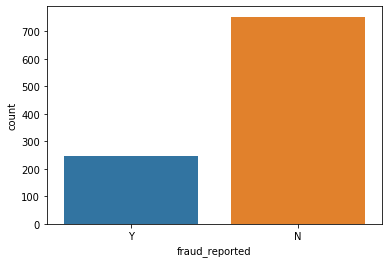

In [96]:
sns.countplot(x="fraud_reported",data=dffraud)

In [97]:
#little imbalanced

In [98]:
dffraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported'],
      dtype='object')

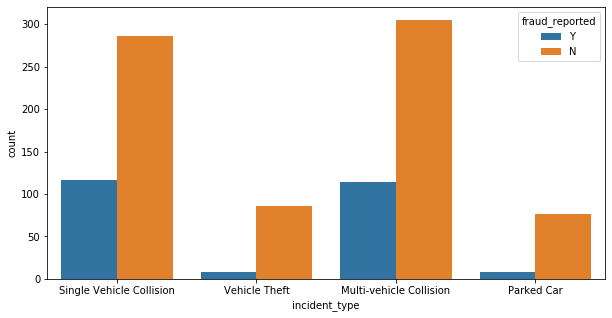

In [99]:
plt.figure(figsize=(10,5))
sns.countplot(x="incident_type",hue="fraud_reported",data=dffraud)

In [100]:
#Multi-vehicle and single vehicle collisions---->more number of frauds

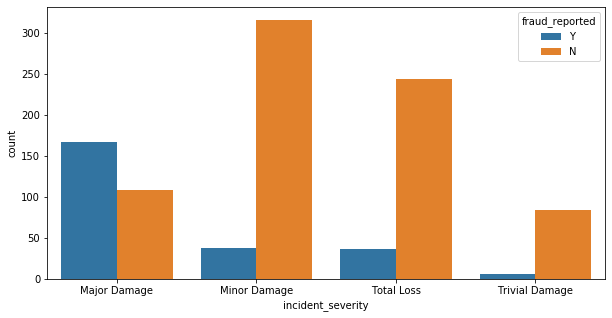

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(x="incident_severity",hue="fraud_reported",data=dffraud)

In [102]:
#major damage has more fraudent claim

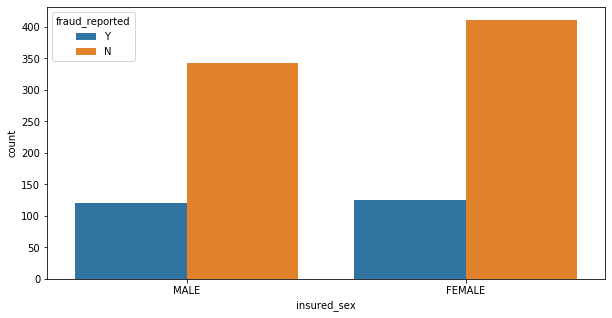

In [103]:
plt.figure(figsize=(10,5))
sns.countplot(x="insured_sex",hue="fraud_reported",data=dffraud)

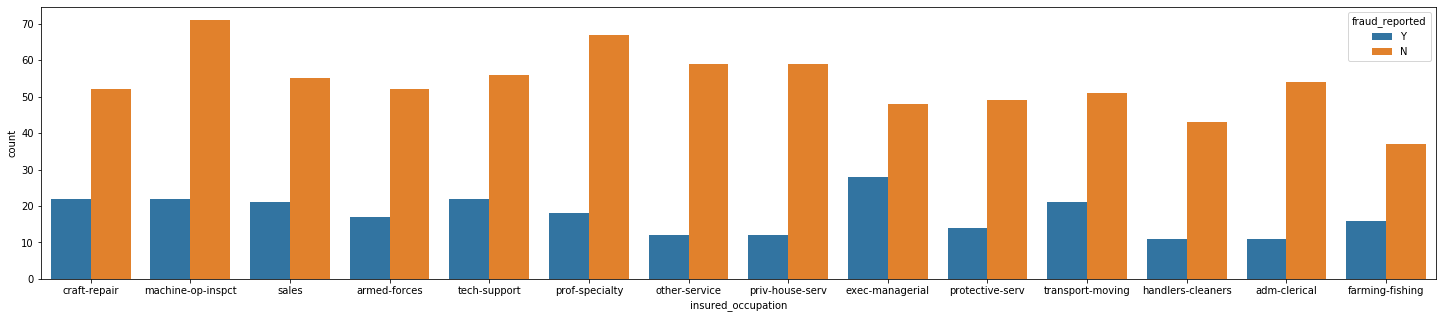

In [104]:
plt.figure(figsize=(25,5))
sns.countplot(x="insured_occupation",hue="fraud_reported",data=dffraud)

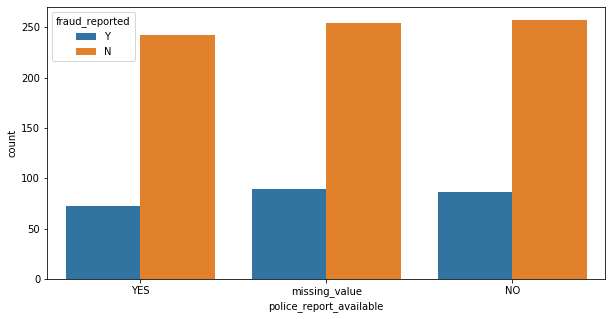

In [105]:
plt.figure(figsize=(10,5))
sns.countplot(x="police_report_available",hue="fraud_reported",data=dffraud)

In [106]:
#police report not available in most fraudent claim

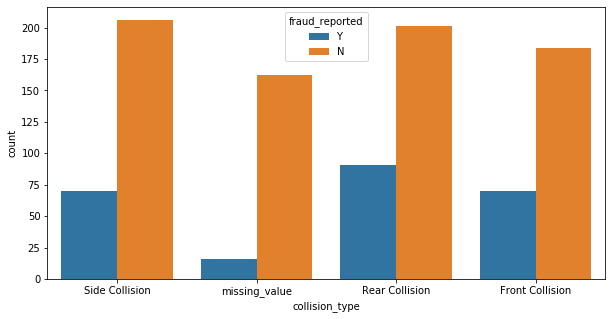

In [107]:
plt.figure(figsize=(10,5))
sns.countplot(x="collision_type",hue="fraud_reported",data=dffraud)

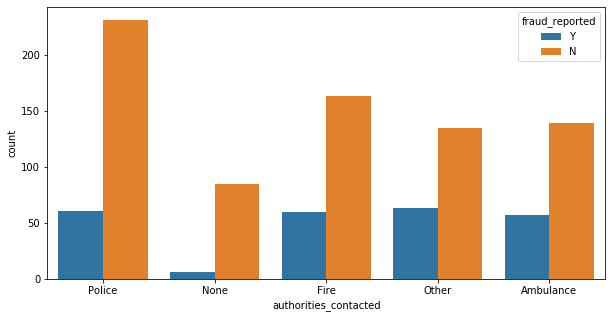

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(x="authorities_contacted",hue="fraud_reported",data=dffraud)

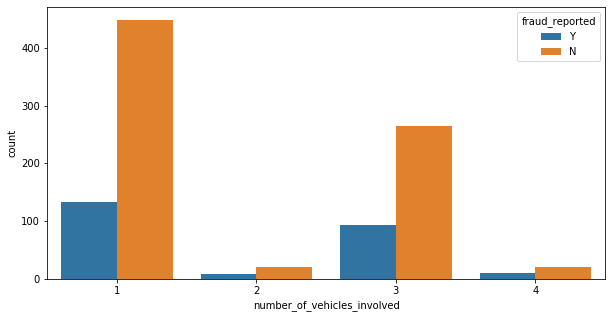

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(x="number_of_vehicles_involved",hue="fraud_reported",data=dffraud)

In [110]:
#using labelencoder to convert all the object type columns to int
from sklearn.preprocessing import LabelEncoder
for col in dffraud.columns:
    if dffraud[col].dtype=="object":
        dffraud[col]=LabelEncoder().fit_transform(dffraud[col])

In [111]:
dffraud

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,521585,1000,1406.91,0,466132,1,4,2,...,1,2,1,71610,6510,13020,52080,10,2004,1
1,228,42,342868,2000,1197.22,5000000,468176,1,4,6,...,0,0,2,5070,780,780,3510,8,2007,1
2,134,29,687698,2000,1413.14,5000000,430632,0,6,11,...,2,3,0,34650,7700,3850,23100,4,2007,0
3,256,41,227811,2000,1415.74,6000000,608117,0,6,1,...,1,2,0,63400,6340,6340,50720,3,2014,1
4,228,44,367455,1000,1583.91,6000000,610706,1,0,11,...,0,1,0,6500,1300,650,4550,0,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,5,2,...,0,1,2,87200,17440,8720,61040,6,2006,0
996,285,41,186934,1000,1436.79,0,608177,0,6,9,...,2,3,2,108480,18080,18080,72320,13,2015,0
997,130,34,918516,500,1383.49,3000000,442797,0,5,1,...,2,3,1,67500,7500,7500,52500,11,1996,0
998,458,62,533940,2000,1356.92,5000000,441714,1,0,5,...,0,1,1,46980,5220,5220,36540,1,1998,0


In [112]:
dffraud.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,...,-0.010162,0.058383,-0.071746,0.062108,0.065329,0.034940,0.061013,0.047655,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,...,-0.015679,0.052359,-0.063040,0.069863,0.075522,0.060898,0.062588,0.030410,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.004564,-0.037264,-0.014422,...,-0.004558,-0.012661,-0.010198,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,...,-0.022765,0.066639,0.004936,0.022839,0.039107,0.064792,0.005269,-0.035379,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,...,0.026780,0.002332,0.010332,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,...,0.022743,-0.006738,0.034177,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,...,0.028695,0.019805,0.050983,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.004564,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,-0.006160,...,-0.020297,0.042463,-0.029056,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.037264,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,-0.020298,...,-0.012072,0.019211,0.016119,0.074226,0.081880,0.055794,0.068348,0.055202,0.043509,0.008808
insured_occupation,0.009814,0.017220,-0.014422,-0.046733,0.035922,0.023422,-0.069077,-0.006160,-0.020298,1.000000,...,-0.000236,-0.014794,-0.020739,0.003692,0.020211,0.003004,-0.000829,0.042621,-0.006676,0.001564


In [113]:
dffraud.drop(['auto_year','insured_occupation','insured_education_level','incident_hour_of_the_day','incident_location'],axis=1,inplace=True)

#no relevannce to fraud report

# Machine learning for classification

In [114]:
#Let's now divide the dataset into input and output
df_x1=dffraud.drop(columns=["fraud_reported"])
y1=dffraud[["fraud_reported"]]

In [115]:
#we will convert the input into into integers using get_dummies
#df_x=pd.get_dummies(df_x,drop_first=True)

In [116]:
#lets check the shape
df_x1.shape

(1000, 28)

In [117]:
df_x1

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_hobbies,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make
0,328,48,521585,1000,1406.91,0,466132,1,17,0,...,1,1,1,2,1,71610,6510,13020,52080,10
1,228,42,342868,2000,1197.22,5000000,468176,1,15,2,...,1,2,0,0,2,5070,780,780,3510,8
2,134,29,687698,2000,1413.14,5000000,430632,0,2,3,...,3,0,2,3,0,34650,7700,3850,23100,4
3,256,41,227811,2000,1415.74,6000000,608117,0,2,4,...,1,2,1,2,0,63400,6340,6340,50720,3
4,228,44,367455,1000,1583.91,6000000,610706,1,2,4,...,1,0,0,1,0,6500,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,13,4,...,1,1,0,1,2,87200,17440,8720,61040,6
996,285,41,186934,1000,1436.79,0,608177,0,17,5,...,1,1,2,3,2,108480,18080,18080,72320,13
997,130,34,918516,500,1383.49,3000000,442797,0,3,2,...,3,2,2,3,1,67500,7500,7500,52500,11
998,458,62,533940,2000,1356.92,5000000,441714,1,0,5,...,1,2,0,1,1,46980,5220,5220,36540,1


In [118]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x1)
x1=sc.transform(df_x1)
x1=pd.DataFrame(x1,columns=df_x1.columns)

In [119]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x1,y1):
    max_aucroc_score=0
    for r_state in range(42,100):
        x1_train, x1_test, y1_train, y1_test = train_test_split(df_x1, y1,random_state = r_state,test_size=0.20,stratify=y1)
        x1_train, y1_train = SMOTE().fit_sample(x1_train, y1_train)
        clf.fit(x1_train,y1_train)
        y1_pred = clf.predict(x1_test)
        aucroc_scr=roc_auc_score(y1_test,y1_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [120]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x1,y1)

auc roc score corresponding to  42  is  0.7492228679551289
auc roc score corresponding to  43  is  0.7147587511825922
auc roc score corresponding to  44  is  0.6976618461954318
auc roc score corresponding to  45  is  0.7417894310041897
auc roc score corresponding to  46  is  0.717529395864306
auc roc score corresponding to  47  is  0.7555750777132044
auc roc score corresponding to  48  is  0.7382078659278282
auc roc score corresponding to  49  is  0.6777942965265575
auc roc score corresponding to  50  is  0.7188809298553859
auc roc score corresponding to  51  is  0.7109068793080147
auc roc score corresponding to  52  is  0.7409785106095419
auc roc score corresponding to  53  is  0.7445600756859035
auc roc score corresponding to  54  is  0.7384781727260441
auc roc score corresponding to  55  is  0.7015137180700094
auc roc score corresponding to  56  is  0.7122584132990945
auc roc score corresponding to  57  is  0.7288147046898229
auc roc score corresponding to  58  is  0.717529395864306

95

In [121]:
#lets use cross_val_score for logistic regression
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg_clf,x1,y1,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg_clf,x1,y1,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg_clf,x1,y1,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.762398010541965
standard deviation in roc auc score for logistic classifier:  0.05247004345999286
[0.7812     0.7444     0.67765914 0.76983376 0.83889715]


In [122]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,x1,y1)

auc roc score corresponding to  42  is  0.6684687119881065
auc roc score corresponding to  43  is  0.7167184754696581
auc roc score corresponding to  44  is  0.7161778618732261
auc roc score corresponding to  45  is  0.7782132720637923
auc roc score corresponding to  46  is  0.7809839167455062
auc roc score corresponding to  47  is  0.7680091904311394
auc roc score corresponding to  48  is  0.7804433031490742
auc roc score corresponding to  49  is  0.6968509258007839
auc roc score corresponding to  50  is  0.7412488174077578
auc roc score corresponding to  51  is  0.6899581024462765
auc roc score corresponding to  52  is  0.7294228949858088
auc roc score corresponding to  53  is  0.6146776591431274
auc roc score corresponding to  54  is  0.7363157183403163
auc roc score corresponding to  55  is  0.7335450736586026
auc roc score corresponding to  56  is  0.6929990539262062
auc roc score corresponding to  57  is  0.706244087038789
auc roc score corresponding to  58  is  0.682794972293553

76

In [123]:
#lets use cross_val_score for decision tree
print("Mean auc roc score for decision tree classifier: ",cross_val_score(dc,df_x1,y1,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for decision tree classifier: ",cross_val_score(dc,df_x1,y1,cv=5,scoring="roc_auc").std())
print(cross_val_score(dc,df_x1,y1,cv=5,scoring="roc_auc"))

Mean auc roc score for decision tree classifier:  0.6904682614767761
standard deviation in auc roc score for decision tree classifier:  0.03367773515385271
[0.66       0.67666667 0.68941749 0.73962698 0.70901473]


In [124]:
#lets use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x1,y1)
clf.best_params_

{'n_estimators': 100}

In [125]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,df_x1,y1)

auc roc score corresponding to  42  is  0.7194891201513718
auc roc score corresponding to  43  is  0.7159075550750101
auc roc score corresponding to  44  is  0.7090147317205028
auc roc score corresponding to  45  is  0.7365860251385322
auc roc score corresponding to  46  is  0.7669279632382754
auc roc score corresponding to  47  is  0.7263819435058791
auc roc score corresponding to  48  is  0.7128666035950805
auc roc score corresponding to  49  is  0.6786727936207596
auc roc score corresponding to  50  is  0.7026625219624274
auc roc score corresponding to  51  is  0.705973780240573
auc roc score corresponding to  52  is  0.7117853764022165
auc roc score corresponding to  53  is  0.7465197999729694
auc roc score corresponding to  54  is  0.749831058251115
auc roc score corresponding to  55  is  0.7159075550750101
auc roc score corresponding to  56  is  0.7842951750236519
auc roc score corresponding to  57  is  0.7266522503040952
auc roc score corresponding to  58  is  0.7120556832004324

69

In [126]:
#lets check cross_val_score for random forest
print("Mean auc roc score for random forest classifier: ",cross_val_score(rf_clf,df_x1,y1,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for random forest classifier: ",cross_val_score(rf_clf,df_x1,y1,cv=5,scoring="roc_auc").std())
print(cross_val_score(rf_clf,df_x1,y1,cv=5,scoring="roc_auc"))

Mean auc roc score for random forest classifier:  0.833366681984052
standard deviation in auc roc score for random forest classifier:  0.04825947373683333
[0.818      0.81846667 0.76118394 0.88187593 0.89322881]


In [127]:
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="roc_auc")
clf.fit(x1,y1)
clf.best_params_

{'n_neighbors': 26}

In [128]:
kc=KNeighborsClassifier(n_neighbors=26)
max_aucroc_score(kc,x1,y1)

auc roc score corresponding to  42  is  0.607919989187728
auc roc score corresponding to  43  is  0.576767130693337
auc roc score corresponding to  44  is  0.5563589674280308
auc roc score corresponding to  45  is  0.6358291661035275
auc roc score corresponding to  46  is  0.6104203270712258
auc roc score corresponding to  47  is  0.6810379781051494
auc roc score corresponding to  48  is  0.6037978105149344
auc roc score corresponding to  49  is  0.6531963778889038
auc roc score corresponding to  50  is  0.6481957021219085
auc roc score corresponding to  51  is  0.5704149209352616
auc roc score corresponding to  52  is  0.576496823895121
auc roc score corresponding to  53  is  0.6236653601838087
auc roc score corresponding to  54  is  0.6142721989458035
auc roc score corresponding to  55  is  0.6705635896742803
auc roc score corresponding to  56  is  0.5737261792134072
auc roc score corresponding to  57  is  0.58697121232599
auc roc score corresponding to  58  is  0.6104203270712258
au

47

In [129]:
#lets use cross_val_score for knn 
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for knn classifier: ",cross_val_score(kc,x1,y1,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for knn classifier: ",cross_val_score(kc,x1,y1,cv=5,scoring="roc_auc").std())
print(cross_val_score(kc,x1,y1,cv=5,scoring="roc_auc"))

Mean roc auc score for knn classifier:  0.6982378934090192
standard deviation in roc auc score for knn classifier:  0.052431843913167256
[0.73226667 0.7102     0.59514799 0.71712394 0.73645087]


In [130]:
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x1,y1)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [131]:
svc=SVC(kernel="linear",C=1)
max_aucroc_score(svc,x1,y1)

auc roc score corresponding to  42  is  0.772671982700365
auc roc score corresponding to  43  is  0.7550344641167724
auc roc score corresponding to  44  is  0.7109068793080147
auc roc score corresponding to  45  is  0.7682794972293553
auc roc score corresponding to  46  is  0.7307744289768888
auc roc score corresponding to  47  is  0.7688201108257873
auc roc score corresponding to  48  is  0.7578051087984863
auc roc score corresponding to  49  is  0.6940802811190702
auc roc score corresponding to  50  is  0.739018786322476
auc roc score corresponding to  51  is  0.7313150425733208
auc roc score corresponding to  52  is  0.7373969455331802
auc roc score corresponding to  53  is  0.7578051087984863
auc roc score corresponding to  54  is  0.7213812677388837
auc roc score corresponding to  55  is  0.7481416407622652
auc roc score corresponding to  56  is  0.7288147046898229
auc roc score corresponding to  57  is  0.7252331396134613
auc roc score corresponding to  58  is  0.7409785106095419

42

In [132]:
#lets use cross_val_score for svm
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for svm classifier: ",cross_val_score(svc,x1,y1,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for svm classifier: ",cross_val_score(svc,x1,y1,cv=5,scoring="roc_auc").std())
print(cross_val_score(svc,x1,y1,cv=5,scoring="roc_auc"))

Mean roc auc score for svm classifier:  0.7690600279317025
standard deviation in roc auc score for svm classifier:  0.04484433603339685
[0.78853333 0.7424     0.70617651 0.76834707 0.83984322]


In [133]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x1,y1)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [141]:
gb_clf=GradientBoostingClassifier(learning_rate=0.001,n_estimators=10)
max_aucroc_score(gb_clf,df_x1,y1)

auc roc score corresponding to  42  is  0.7958507906473847
auc roc score corresponding to  43  is  0.7740910933909987
auc roc score corresponding to  44  is  0.8452493580213543
auc roc score corresponding to  45  is  0.8424787133396405
auc roc score corresponding to  46  is  0.8791728611974592
auc roc score corresponding to  47  is  0.8526827949722935
auc roc score corresponding to  48  is  0.8182186781997567
auc roc score corresponding to  49  is  0.7790241924584403
auc roc score corresponding to  50  is  0.750101365049331
auc roc score corresponding to  51  is  0.8353155831869172
auc roc score corresponding to  52  is  0.8957291525881875
auc roc score corresponding to  53  is  0.8554534396540073
auc roc score corresponding to  54  is  0.8212596296796864
auc roc score corresponding to  55  is  0.8518718745776456
auc roc score corresponding to  56  is  0.8286930666306257
auc roc score corresponding to  57  is  0.8460602784160021
auc roc score corresponding to  58  is  0.811055548047033

52

In [135]:
#lets check cross_val_score for gradient boosting
print("Mean auc roc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x1,y1,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x1,y1,cv=5,scoring="roc_auc").std())
print(cross_val_score(gb_clf,df_x1,y1,cv=5,scoring="roc_auc"))

Mean auc roc score for gradient boosting classifier:  0.8740572942289498
standard deviation in auc roc score for gradient boosting classifier:  0.03895983582099272
[0.85406667 0.85633333 0.82288147 0.93086904 0.90613596]


In [136]:
from sklearn.ensemble import AdaBoostClassifier
#parameters={"base_estimator":[dc,lg_clf,svc],"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ada_clf=AdaBoostClassifier(base_estimator=dc)
max_aucroc_score(ada_clf,df_x1,y1)

auc roc score corresponding to  42  is  0.7203000405460197
auc roc score corresponding to  43  is  0.6863765373699149
auc roc score corresponding to  44  is  0.7944992566563048
auc roc score corresponding to  45  is  0.7409785106095419
auc roc score corresponding to  46  is  0.7404378970131098
auc roc score corresponding to  47  is  0.7373969455331802
auc roc score corresponding to  48  is  0.7404378970131098
auc roc score corresponding to  49  is  0.7440194620894716
auc roc score corresponding to  50  is  0.7307744289768888
auc roc score corresponding to  51  is  0.7371266387349641
auc roc score corresponding to  52  is  0.7909176915799433
auc roc score corresponding to  53  is  0.7536829301256925
auc roc score corresponding to  54  is  0.7230706852277335
auc roc score corresponding to  55  is  0.6965806190025678
auc roc score corresponding to  56  is  0.7310447357751046
auc roc score corresponding to  57  is  0.6160291931342073
auc roc score corresponding to  58  is  0.72253007163130

97

In [142]:
# we will use gradient boosting classifier as our final model
# random state 76
x1_train, x1_test, y1_train, y1_test = train_test_split(df_x1, y1,random_state = 52,test_size=0.20,stratify=y1)
x1_train, y1_train = SMOTE().fit_sample(x1_train, y1_train)
gb_clf=GradientBoostingClassifier(learning_rate=0.01,n_estimators=10)
gb_clf.fit(x1_train,y1_train)
y1_pred=gb_clf.predict(x1_test)

In [143]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y1_test,y1_pred))
print("f1 score is : ",f1_score(y1_test,y1_pred))
print("classification report \n",classification_report(y1_test,y1_pred))
print("AUC ROC Score: ",roc_auc_score(y1_test,y1_pred))

Confusion matrix 
 [[138  13]
 [  7  42]]
f1 score is :  0.8076923076923076
classification report 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       151
           1       0.76      0.86      0.81        49

    accuracy                           0.90       200
   macro avg       0.86      0.89      0.87       200
weighted avg       0.91      0.90      0.90       200

AUC ROC Score:  0.8855250709555346


In [144]:
dft1=pd.DataFrame(y1_pred)
dft1.to_csv('prediction_fraudreport.csv')

In [148]:
import joblib
joblib.dump(gb_clf,'fraudreport.obj')

['fraudreport.obj']